In [31]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
import torch
#importlib.reload(src.data.utils)
from src.data.sim_coxph import triangle_mask, circle_mask
from torchvision.utils import save_image



In [32]:
def rectangle_mask(img_size, 
                   length,
                   color,
                   n_dim,
                   pos_random=True,
                   seed=1328):

    random = np.random.RandomState(seed)
    if n_dim == 1:
        img = np.zeros((n_dim, img_size, img_size), dtype='float32')
    else:
        img = np.zeros((img_size, img_size, n_dim), dtype='float32')

    if pos_random is False:
        upper_corner = (14, 14)
        lower_corner = (10, 10)
    else:
        height = random.randint(img_size, size=1)[0]
        width = random.randint(img_size-length, size=1)[0]
        upper_corner = (height, width)
    if n_dim == 1:
        img[:, upper_corner[0]- length: upper_corner[0], upper_corner[1]:upper_corner[1]+length] = color
    else:
        # pdb.set_trace()
        # lower_corner = (upper_corner[0]-length, upper_corner[1]-length)
        # img = cv2.rectangle(img, lower_corner, upper_corner, color, thickness=-1)
        # img = img.reshape(n_dim, img_size, img_size)

        left_corner = [14, 14]
        # points = np.array([[left_corner[0], left_corner[1]],
        #                 [left_corner[0] + 10, left_corner[1]],
        #                 [left_corner[0], left_corner[1] + 10],
        #                 [left_corner[0] + 10, left_corner[1] + 10]], np.int32)
        points = np.array([[left_corner[0], left_corner[1]],
                        [left_corner[0], left_corner[1] + length],
                        [left_corner[0] + length, left_corner[1] + length],
                        [left_corner[0] + length, left_corner[1]]], np.int32)

        
        image = cv2.fillPoly(img, [points], color=color)
        img = image.reshape(n_dim, img_size, img_size)

    return img 

In [37]:
# color_1 = (3, 34, 174)
# color_2 = (153, 230, 104)
# color_3 = (88, 196, 207)
# color_4 = (220, 47, 84)
color_1 = (0, 0, 0)
color_2 = (64, 64, 64)
color_3 = (128, 128, 128)
color_4 = (255, 255, 255)

In [38]:
img_triangle = triangle_mask(img_size=28, length=4, color=(255, 0, 0), n_dim=3, pos_random=True)
img_circle = circle_mask(img_size=28, center=14, radius=4, color=(0, 128, 128), n_dim=3)
img_rectangle = rectangle_mask(img_size=28, length=4, color=(0, 128, 0), n_dim=3)

img_1 = triangle_mask(img_size=28, length=4, color=color_1, n_dim=3, pos_random=True)
img_2  = circle_mask(img_size=28, center=14, radius=4, color=color_2, n_dim=3)
img_3 = rectangle_mask(img_size=28, length=4, color=color_3, n_dim=3)
img_4 =  triangle_mask(img_size=28, length=4, color=color_4, n_dim=3, pos_random=True)

worked triangle
worked circle
worked triangle
worked circle
worked triangle


In [39]:
img_triangle = img_triangle.reshape(28, 28, 3)
img_circle = img_circle.reshape(28, 28, 3)
img_rectangle = img_rectangle.reshape(28, 28, 3)

img_1 = img_1.reshape(28, 28, 3)
img_2 = img_2.reshape(28, 28, 3)
img_3 = img_3.reshape(28, 28, 3)
img_4 = img_4.reshape(28, 28, 3)

(0.0, 1.0, 0.0, 1.0)

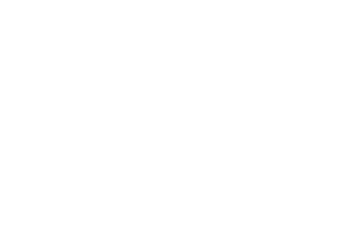

In [40]:
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


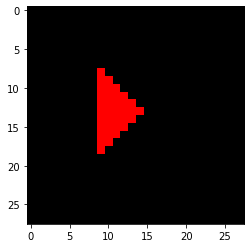

In [41]:
plt.imshow(img_triangle)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


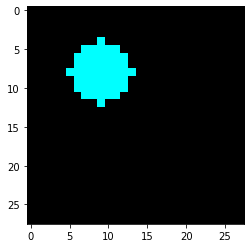

In [42]:
plt.imshow(img_circle)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


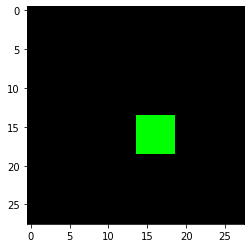

In [43]:
plt.imshow(img_rectangle)   

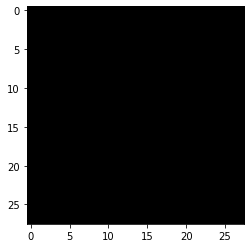

In [13]:
plt.imshow(img_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


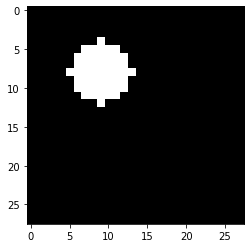

In [44]:
plt.imshow(img_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


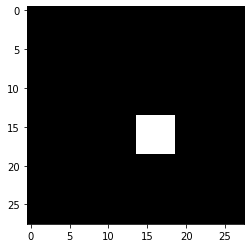

In [15]:
plt.imshow(img_3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


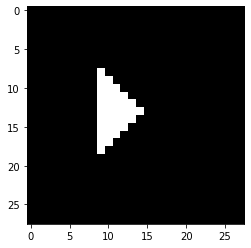

In [16]:
plt.imshow(img_4)

In [17]:
def circle_mask2(img_size, center, radius, color, n_dim, pos_random=True, seed=1328):
    random = np.random.RandomState(seed)
    img = np.zeros((img_size, img_size, n_dim), dtype='float32')
    if pos_random is False:
        center = center
    else:
        center = (random.randint(img_size - radius, size=1)[0], random.randint(img_size - radius, size=1)[0])
    
    img = cv2.circle(img, center, radius, color, thickness=-1)

    image = img.reshape(n_dim, img_size, img_size)

    print("test sssss worked circle")

    return image



In [18]:
img_circle_test = circle_mask2(img_size=28, center=14, radius=5, color=(220, 47, 84), n_dim=3, pos_random=True)

test sssss worked circle


In [19]:
img_circle_test = img_circle_test.reshape(28, 28, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


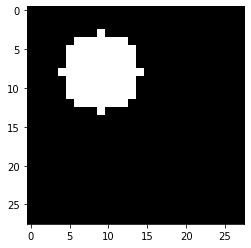

In [20]:
plt.imshow(img_circle_test)

In [21]:
def minmax_normalize(x, lower_bound=None, upper_bound=None):
    """
    Normalize a provided array to 0-1 range.

    Normalize a provided array to 0-1 range.
    :param x: Input array
    :param lower_bound: Optional lower bound. Takes minimum of x if not provided.
    :param upper_bound: Optional upper bound. Takes maximum of x if not provided.
    :return: Normalized array
    """
    if lower_bound is None:
        lower_bound = np.min(x)

    if upper_bound is None:
        upper_bound = np.max(x)

    return (x - lower_bound) / (upper_bound - lower_bound)


In [22]:
circle_norm = minmax_normalize(img_circle_test)

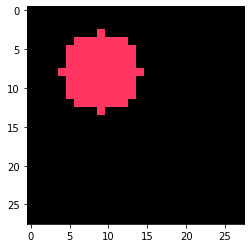

In [23]:
plt.imshow(circle_norm)

In [24]:
circle_norm = cv2.cvtColor(circle_norm, cv2.COLOR_BGR2RGB)

In [25]:
# circle_norm_torch = torch.from_numpy(circle_norm)
circle_norm_torch = torch.Tensor(circle_norm)
circle_norm_torch = circle_norm_torch.reshape(3, 28, 28)
circle_norm_torch.shape


torch.Size([3, 28, 28])

In [26]:
save_image(circle_norm_torch, "circle_norm.png")

In [27]:
img_4_torch = torch.Tensor(img_circle)
img_4_torch = img_4_torch.reshape(3, 28, 28)


In [28]:
save_image(img_4_torch, "img_4_torch.png")